# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Desak Putu Tia Rusilia Wati]
- **Email:** [wati.2208561143@student.unud.ac.id]
- **ID Dicoding:** [desakpututia09]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan rata-rata jumlah penyewaan sepeda pada hari kerja dibandingkan dengan hari libur atau akhir pekan, dan apakah perbedaan tersebut signifikan?
- Bagaimana tren pengunaan sewa sepeda berdasarkan jam dan apakah jam pagi (6-12) lebih unggul?
- Apakah terdapat peningkatan jumlah total rental  (tahun 2011 dengan 2012)?

## Import Semua Packages/Library yang Digunakan

Instal terlebih dahulu sebelum import

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


Import library yang dibutuhkan setalah melakukan penginstalan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from datetime import datetime

## Data Wrangling

### Gathering Data

Saya memilih Bike Sharing Dataset sebagai tujuan analisis. Maka import day.csv dan hour.csv

In [7]:
day_df = pd.read_csv('/Users/sakti/Downloads/dicodingproject/data/day.csv')
hour_df = pd.read_csv('/Users/sakti/Downloads/dicodingproject/data/hour.csv')

In [8]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terlihat bahwa day_df diaggregasikan berdasarkan hari 
- Terlihat bahwa hour_df diaggregasikan berdasarkan jam 

### Assessing Data

Coba melihat dan menilai masing masing dataset

1. Fokus pada dataset day_df

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Ada satu tipe data yang perlu diubah format tipenya yaitu  kolom 'dteday' dengan tipe data object. sesuai denga pembahsan dicoding bisa kita gunakan format *datetime
- Tipe data pada kolom yang lain sudah sesuai yg diharapkan yaitu terdapat int dan float.
- Semua memiliki 731 entri dan tidak ada data yang hilang

In [11]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


insight : 
-  Tidak ada terliat aneh pada data, terlihat normal

In [12]:
#Mengecek duplikasi data pada dataset day_df
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

#hasilnya tidak ada data yang double pada dataset day_df

Jumlah duplikasi data:  0


2. Fokus pada dataset hour_df

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Ada satu tipe data yang perlu diubah format tipenya yaitu  kolom 'dteday' dengan tipe data object. sesuai denga pembahsan dicoding bisa kita gunakan format *datetime
- Tipe data pada kolom yang lain sudah sesuai yg diharapkan yaitu terdapat int dan float.
- Semua memiliki 17379 entri dan tidak ada data yang hilang

In [14]:
#Mengecek duplikasi data pada dataset hour_df
print("Jumlah duplikasi data hour: ", hour_df.duplicated().sum())

#hasilnya tidak ada data yang double pada dataset hour_df

Jumlah duplikasi data hour:  0


In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- data terlihat normal, tidak ada hal yang menyimpang jauh pada setiap kolomnya

### Cleaning Data

Pertanyaan bisnis yang saya tetapkan : 
- Bagaimana perbedaan rata-rata jumlah penyewaan sepeda pada hari kerja dibandingkan dengan hari libur atau akhir pekan, dan apakah perbedaan tersebut signifikan?
- Bagaimana perbedaan rata-rata jumlah penyewaan sepeda pada jam pagi (jam 6-12) dibanding dengan jam (12-18), dan apakah perbedaan tersebut signifikan?
- Apakah terdapat peningkatan jumlah total rental  (tahun 2011 dengan 2012)?

kolom yang dapat dihilangkan : 'instant', 'season', 'mnth', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'

1. day_df

In [16]:
# Drop kolom yang tidak relevan pada day_df
day_df = day_df.drop(columns=['instant', 'season', 'mnth', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'])


In [17]:
day_df.head()

,dteday,yr,holiday,weekday,workingday,casual,registered,cnt
0,2011-01-01,0,0,6,0,331,654,985
1,2011-01-02,0,0,0,0,131,670,801
2,2011-01-03,0,0,1,1,120,1229,1349
3,2011-01-04,0,0,2,1,108,1454,1562
4,2011-01-05,0,0,3,1,82,1518,1600


In [18]:
# Mengubah tipe data ke datetime
day_df['dteday'] = pd.to_datetime(day_df.dteday)

In [19]:
day_df.head()

,dteday,yr,holiday,weekday,workingday,casual,registered,cnt
0,2011-01-01,0,0,6,0,331,654,985
1,2011-01-02,0,0,0,0,131,670,801
2,2011-01-03,0,0,1,1,120,1229,1349
3,2011-01-04,0,0,2,1,108,1454,1562
4,2011-01-05,0,0,3,1,82,1518,1600


In [20]:
day_df.info()

#sudah berhasil format datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   yr          731 non-null    int64         
 2   holiday     731 non-null    int64         
 3   weekday     731 non-null    int64         
 4   workingday  731 non-null    int64         
 5   casual      731 non-null    int64         
 6   registered  731 non-null    int64         
 7   cnt         731 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 45.8 KB


**Insight:**
- pada data day_df sudah dilakukan drop kolom dan format data, kualitas data yang akaln dianalisa menjadi meningkat

2. hour_df


In [21]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
# Drop kolom yang tidak relevan pada day_df
hour_df = hour_df.drop(columns=['instant', 'season', 'mnth', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'])

In [23]:
hour_df.head()


,dteday,yr,hr,holiday,weekday,workingday,casual,registered,cnt
0,2011-01-01,0,0,0,6,0,3,13,16
1,2011-01-01,0,1,0,6,0,8,32,40
2,2011-01-01,0,2,0,6,0,5,27,32
3,2011-01-01,0,3,0,6,0,3,10,13
4,2011-01-01,0,4,0,6,0,0,1,1


In [24]:
# Mengubah tipe data ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df.dteday)

In [25]:
hour_df.info()

#sudah berhasil format datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   yr          17379 non-null  int64         
 2   hr          17379 non-null  int64         
 3   holiday     17379 non-null  int64         
 4   weekday     17379 non-null  int64         
 5   workingday  17379 non-null  int64         
 6   casual      17379 non-null  int64         
 7   registered  17379 non-null  int64         
 8   cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 1.2 MB


**Insight:**
- pada data hour_df sudah dilakukan drop kolom dan format data, kualitas data yang akaln dianalisa menjadi meningkat

## Exploratory Data Analysis (EDA)

### Explore day_df
Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan 'workingday' 'holiday'

In [26]:
#Dalam segi workingday
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
    

cnt                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

In [27]:
#Dalam segi weekday
day_df.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
          max   min         mean     sum
weekday                                 
0        8227   605  4228.828571  444027
1        7525    22  4338.123810  455503
2        7767   683  4510.663462  469109
3        8173   441  4548.538462  473048
4        7804   431  4667.259615  485395
5        8362  1167  4690.288462  487790
6        8714   627  4550.542857  477807

In [28]:
#Dalam segi holiday
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

DALAM SEGI TAHUN

In [29]:
#Dalam segi tahun
day_df.groupby(by='yr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
     max  min         mean      sum
yr                                 
0   6043  431  3405.761644  1243103
1   8714   22  5599.934426  2049576

In [30]:
#Dalam segi jam
hour_df.groupby(by='hr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

In [31]:
#definisikan jam dengan keadaan hari (morning dan afternoon)
earlymorning_df = hour_df[(hour_df['hr'] >= 0) & (hour_df['hr'] < 6)]
morning_df = hour_df[(hour_df['hr'] >= 6) & (hour_df['hr'] < 12)]
afternoon_df = hour_df[(hour_df['hr'] >= 12) & (hour_df['hr'] < 18)]
evening_df = hour_df[(hour_df['hr'] >= 18) & (hour_df['hr'] < 23)]

In [32]:
# Rata-rata jumlah penyewaan pada berbagai waktu
print("Rata-rata jumlah penyewaan pada jam pagi buta (00:00 - 06:00): ", earlymorning_df['cnt'].mean())
print("Rata-rata jumlah penyewaan pada jam pagi (06:00 - 12:00): ", morning_df['cnt'].mean())
print("Rata-rata jumlah penyewaan pada jam siang (12:00 - 18:00): ", afternoon_df['cnt'].mean())
print("Rata-rata jumlah penyewaan pada jam sore (18:00 - 23:00): ", evening_df['cnt'].mean())


Rata-rata jumlah penyewaan pada jam pagi buta (00:00 - 06:00):  24.908559401309635
Rata-rata jumlah penyewaan pada jam pagi (06:00 - 12:00):  208.1006880733945
Rata-rata jumlah penyewaan pada jam siang (12:00 - 18:00):  295.4838857142857
Rata-rata jumlah penyewaan pada jam sore (18:00 - 23:00):  253.34285714285716


**Insight:**
- Aktivitas penyewaan sepeda pada jam pagi buta sangat rendah.
- Penyewaan sepeda meningkat signifikan di jam pagi.
- Jam siang hingga sore merupakan waktu dengan jumlah penyewaan tertinggi. 
- Meskipun sedikit menurun dibandingkan dengan jam siang, penyewaan sepeda masih cukup tinggi pada jam sore.


Hubungan 'casual', 'registered', 'ctn', 'holiday', 'weekday',	'workingday'

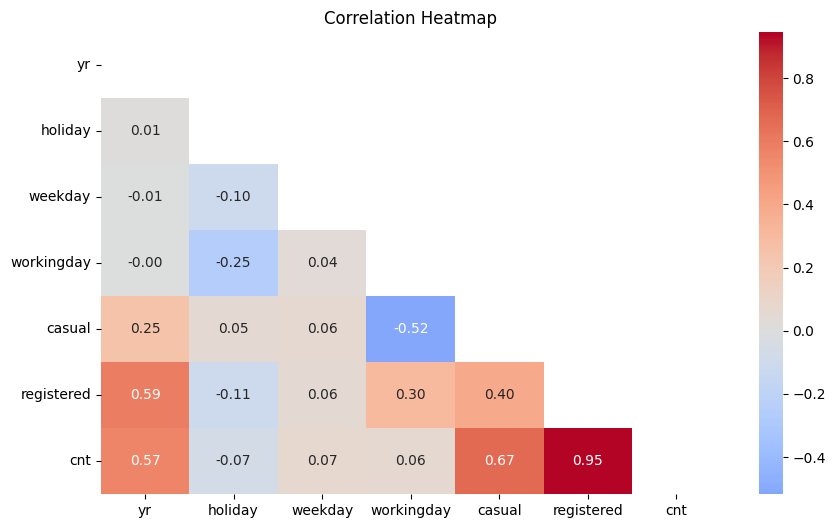

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- Nilai korelasi paling tinggi yaitu (0.95) 'registered' dengan 'ctn' menandakan jumlah total penyewaan sepeda 'ctn' sangat dipengaruhi oleh penyewaan dari pengguna terdaftar.
- Nilai korelasi antara 'yr' dengan 'ctn' cukup tinggi yaitu (0.57) menandakan jumlah total penyewaan sepeda 'ctn' sangat dipengaruhi oleh tahun.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan rata-rata jumlah penyewaan sepeda pada hari kerja dibandingkan dengan hari libur atau akhir pekan, dan apakah perbedaan tersebut signifikan?

In [34]:
# Definisikan dan pisahkan data hari kerja dan hari non-kerja ('workingday')
workingday_df = day_df[day_df['workingday'] == 1]['cnt']
non_workingday_df = day_df[day_df['workingday'] == 0]['cnt']

mean_workingday = workingday_df.mean()
mean_non_workingday = non_workingday_df.mean()

# Tampilkan rata-rata
print("Rata-rata jumlah penyewaan pada workingday: ", mean_workingday)
print("Rata-rata jumlah penyewaan pada non-workingday atau akhir pekan/hari libur: ", mean_non_workingday)


Rata-rata jumlah penyewaan pada workingday:  4584.82
Rata-rata jumlah penyewaan pada non-workingday atau akhir pekan/hari libur:  4330.168831168831


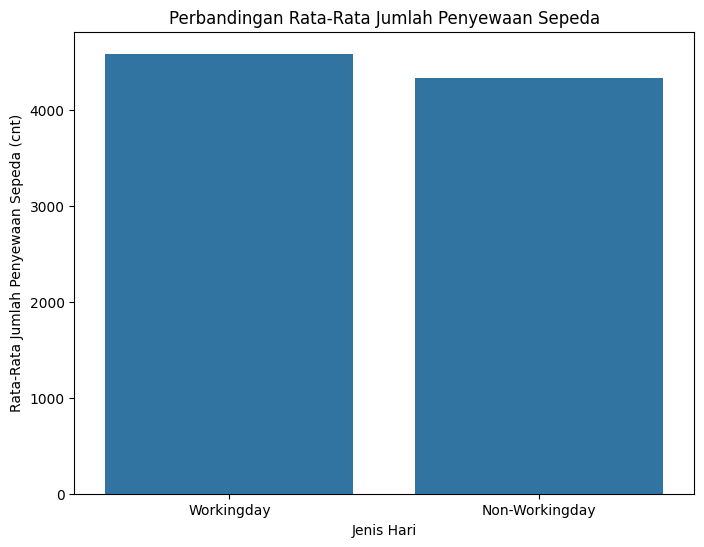

In [35]:
categories = ['Workingday', 'Non-Workingday']
means = [mean_workingday, mean_non_workingday]

# Buat visualisasi menggunakan barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=means)

plt.title("Perbandingan Rata-Rata Jumlah Penyewaan Sepeda")
plt.ylabel("Rata-Rata Jumlah Penyewaan Sepeda (cnt)")
plt.xlabel("Jenis Hari")
plt.show()

**Insight:**
- Rata-rata penyewaan sepeda pada hari kerja (workingday) adalah 4584.82. yang menunjukkan bahwa sepeda sering digunakan pada hari kerja, namun perbedaannya tidak terlalu signifikan antara rata-rata jumlah penyewaan sepeda pada hari kerja dan hari non-kerja.  

### Pertanyaan 2: Bagaimana tren pengunaan sewa sepeda berdasarkan jam dan apakah jam pagi (6-12) lebih unggul?

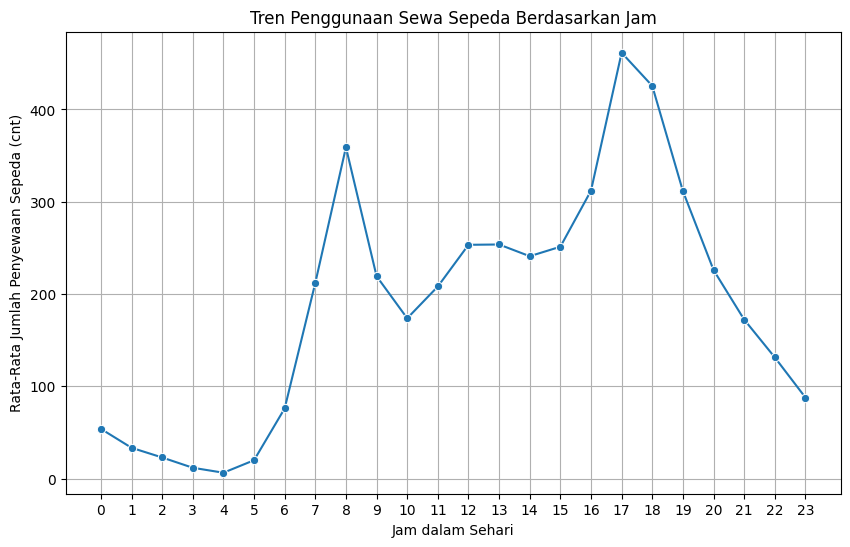

In [36]:
# Definisikan
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()

# Visualisasikan
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o')
plt.title("Tren Penggunaan Sewa Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-Rata Jumlah Penyewaan Sepeda (cnt)")
plt.xticks(range(0, 24))  # Menambahkan tanda jam dari 0 sampai 23
plt.grid(True)
plt.show()

**Insight:**
- Puncak penggunaan sepeda terjadi pada jam 17:00 dengan rata-rata jumlah penyewaan mencapai lebih dari 400.
- Terjadi lonjakan besar pada jam 08:00-09:00 dengan jumlah penyewaan sekitar 300-400

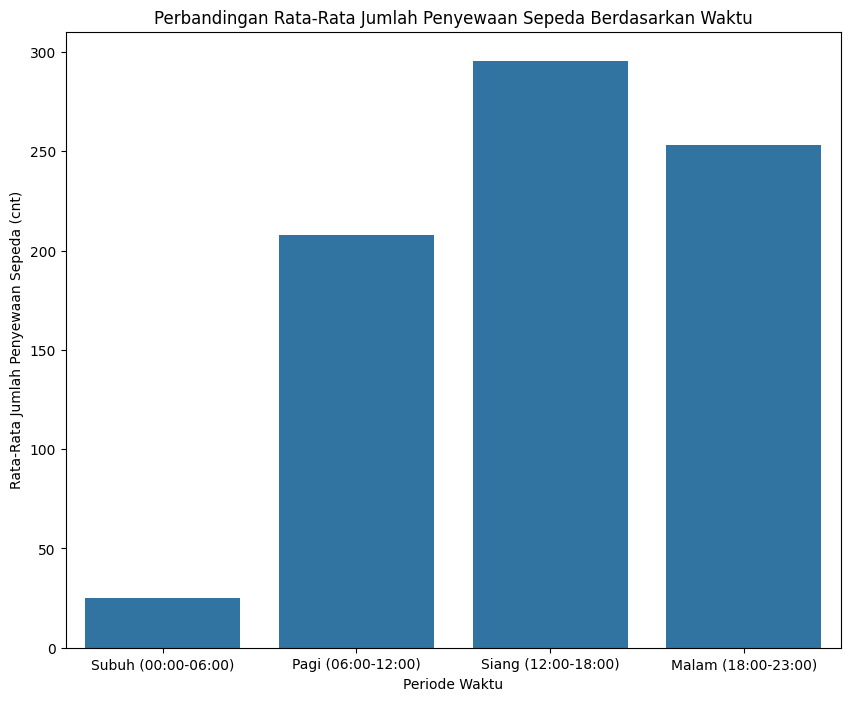

In [37]:
#visualisasi
plt.figure(figsize=(10,8))
time_periods = ['Subuh (00:00-06:00)', 'Pagi (06:00-12:00)', 'Siang (12:00-18:00)', 'Malam (18:00-23:00)']
means = [earlymorning_df['cnt'].mean(), morning_df['cnt'].mean(), afternoon_df['cnt'].mean(), evening_df['cnt'].mean()]

sns.barplot(x=time_periods, y=means)

# Tambahkan label dan judul
plt.title("Perbandingan Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Waktu")
plt.ylabel("Rata-Rata Jumlah Penyewaan Sepeda (cnt)")
plt.xlabel("Periode Waktu")

# Tampilkan plot
plt.show()


**Insight:**
- Pada Siang hari (12:00 - 18:00) memiliki rata-rata penyewaan sepeda tertinggi di antara semua periode waktu, dengan penyewaan mendekati 300 sepeda per jam. 
- Pada Pagi hari (06:00 - 12:00) juga memiliki penggunaan yang cukup tinggi, dengan rata-rata sekitar 200 penyewaan sepeda per jam.

### Pertanyaan 3: Apakah terdapat peningkatan jumlah total rental  (tahun 2011 dengan 2012)?

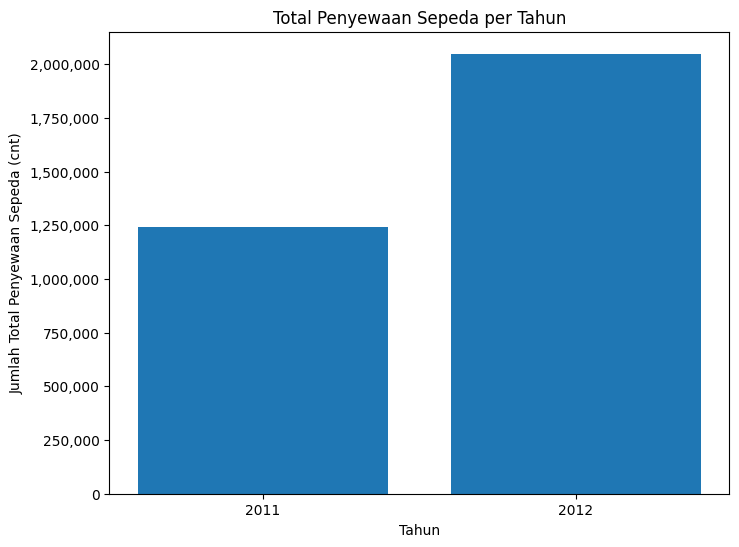

In [38]:
import matplotlib.ticker as mtick

day_df['year'] = day_df['yr'].map({0: '2011', 1: '2012'})
yearly_rentals = day_df.groupby('year')['cnt'].sum().reset_index()

# Visualize using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(yearly_rentals['year'], yearly_rentals['cnt'])

plt.title("Total Penyewaan Sepeda per Tahun")
plt.ylabel("Jumlah Total Penyewaan Sepeda (cnt)")
plt.xlabel("Tahun")

# Format y-axis with thousand separator
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Display the plot
plt.show()

**Insight:**
- Terjadi peningkatan signifikan dalam total penyewaan sepeda dari tahun 2011 ke 2012

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Rata-rata penyewaan sepeda pada hari kerja (workingday) adalah 4584.82 penyewaan, sedangkan pada hari non-kerja (akhir pekan atau hari libur), rata-rata penyewaan adalah 4330.17. Perbedaan rata-rata penyewaan sepeda antara hari kerja dan hari non-kerja tidak terlalu signifikan, meskipun hari kerja menunjukkan sedikit peningkatan penyewaan yang di mana mengindikasikan bahwa sepeda digunakan secara konsisten baik pada hari kerja maupun hari libur/akhir pekan.

- Conclution pertanyaan 2
 * Puncak penggunaan sepeda terjadi pada jam 17:00 dengan rata-rata lebih dari 400 penyewaan di mana menunjukkan bahwa banyak pengguna yang menggunakan sepeda pada sore hari. Peningkatan besar kedua terjadi pada jam 08:00-09:00 dengan jumlah penyewaan mendekati 300-400 penyewaan per jam. 
 * Jam pagi (06:00 - 12:00) memang menunjukkan penggunaan sepeda yang signifikan, dengan rata-rata penyewaan sekitar 200 sepeda per jam. Namun, tidak lebih unggul dibandingkan periode siang (12:00 - 18:00), yang mencatat rata-rata penyewaan lebih tinggi, mendekati 300 penyewaan per jam. Periode siang memiliki penggunaan sepeda tertinggi dibandingkan semua periode waktu lainnya

 - Conclution pertanyaan 3
 Terjadi peningkatan yang sangat signifikan dalam total jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012. Pada tahun 2011, total penyewaan sepeda adalah sekitar 1,243,103 dan tahun 2012, total penyewaan sepeda meningkat secara signifikan menjadi sekitar 2,049,576. Peningkatan ini menunjukkan bahwa penggunaan layanan penyewaan sepeda menjadi jauh lebih populer pada tahun 2012 dibandingkan dengan 2011.